In [61]:
import pandas as pd


In [62]:
data=pd.read_csv("House Price India.csv")

In [63]:
data.head()

,id,Date,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,...,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price
0,6762810635,42491,4,2.50,2920,4000,1.5,0,0,5,...,1909,0,122004,52.8878,-114.470,2470,4000,2,51,1400000
1,6762810998,42491,5,2.75,2910,9480,1.5,0,0,3,...,1939,0,122004,52.8852,-114.468,2940,6600,1,53,1200000
2,6762812605,42491,4,2.50,3310,42998,2.0,0,0,3,...,2001,0,122005,52.9532,-114.321,3350,42847,3,76,838000
3,6762812919,42491,3,2.00,2710,4500,1.5,0,0,4,...,1929,0,122006,52.9047,-114.485,2060,4500,1,51,805000
4,6762813105,42491,3,2.50,2600,4750,1.0,0,0,4,...,1951,0,122007,52.9133,-114.590,2380,4750,1,67,790000


In [64]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14619 entries, 0 to 14618
Data columns (total 23 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     14619 non-null  int64  
 1   Date                                   14619 non-null  int64  
 2   number of bedrooms                     14619 non-null  int64  
 3   number of bathrooms                    14619 non-null  float64
 4   living area                            14619 non-null  int64  
 5   lot area                               14619 non-null  int64  
 6   number of floors                       14619 non-null  float64
 7   waterfront present                     14619 non-null  int64  
 8   number of views                        14619 non-null  int64  
 9   condition of the house                 14619 non-null  int64  
 10  grade of the house                     14619 non-null  int64  
 11  Ar

In [65]:
stats=data["Price"].describe().reset_index()
stats["Price"]=round(stats["Price"],2)

In [66]:
stats

,index,Price
0,count,14619.00
1,mean,538806.28
2,std,367229.36
3,min,78000.00
4,25%,320000.00
5,50%,450000.00
6,75%,645000.00
7,max,7700000.00


In [67]:
data.isna().sum().sum()

np.int64(0)

In [68]:
data.duplicated().sum()

np.int64(0)

In [69]:
data.columns

Index(['id', 'Date', 'number of bedrooms', 'number of bathrooms',
       'living area', 'lot area', 'number of floors', 'waterfront present',
       'number of views', 'condition of the house', 'grade of the house',
       'Area of the house(excluding basement)', 'Area of the basement',
       'Built Year', 'Renovation Year', 'Postal Code', 'Lattitude',
       'Longitude', 'living_area_renov', 'lot_area_renov',
       'Number of schools nearby', 'Distance from the airport', 'Price'],
      dtype='object')

In [70]:
import matplotlib.pyplot as plt


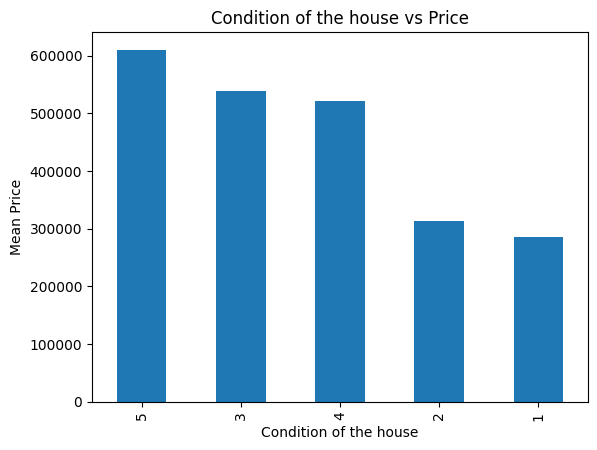

In [71]:
data.groupby("condition of the house")["Price"].mean().sort_values(ascending=False).plot(kind="bar")
plt.title("Condition of the house vs Price")
plt.ylabel("Mean Price")
plt.xlabel("Condition of the house")
plt.show()

In [72]:
X=data[['number of bedrooms', 'number of bathrooms','Number of schools nearby','living area','condition of the house']]
y=data[['Price']]

In [73]:
X

,number of bedrooms,number of bathrooms,Number of schools nearby,living area,condition of the house
0,4,2.50,2,2920,5
1,5,2.75,1,2910,3
2,4,2.50,3,3310,3
3,3,2.00,1,2710,4
4,3,2.50,1,2600,4
...,...,...,...,...,...
14614,2,1.50,3,1556,4
14615,3,2.00,3,1680,4
14616,2,1.00,2,1070,3
14617,4,1.00,3,1030,4


In [74]:
y

,Price
0,1400000
1,1200000
2,838000
3,805000
4,790000
...,...
14614,221700
14615,219200
14616,209000
14617,205000


In [75]:
data.shape[0]*0.8

11695.2

In [76]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X,y, test_size=0.2)

In [77]:
X_train.shape

(11695, 5)

In [78]:
from sklearn.model_selection import GridSearchCV

In [79]:
from sklearn.tree import DecisionTreeRegressor
param_grid={
    "criterion" : ["mse","friedman_mse","mae"],
    "splitter" :["best","random"],
    "max_depth" :[None,10,20,30,40,50],
    "min_samples_split" :[2,5,10],
    "min_samples_leaf" :[1,2,4]
}

In [80]:
tree_model= DecisionTreeRegressor()

In [81]:
grid_tree=GridSearchCV(estimator=tree_model,param_grid=param_grid)

In [82]:
grid_tree.fit(X_train,y_train)

C:\Users\gauta\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning: 
1080 fits failed out of a total of 1620.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
540 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\gauta\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\gauta\AppData\Local\Packages\PythonSoftwareFou

,estimator,DecisionTreeRegressor()
,param_grid,"{'criterion': ['mse', 'friedman_mse', ...], 'max_depth': [None, 10, ...], 'min_samples_leaf': [1, 2, ...], 'min_samples_split': [2, 5, ...], ...}"
,scoring,None
,n_jobs,None
,refit,True
,cv,None
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'friedman_mse'


In [83]:
grid_tree.best_params_

{'criterion': 'friedman_mse',
 'max_depth': 10,
 'min_samples_leaf': 4,
 'min_samples_split': 10,
 'splitter': 'random'}

In [84]:
tree_pred=grid_tree.predict(X_test)

In [85]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, tree_pred)

63388031331.31429

In [86]:
import joblib
joblib.dump(grid_tree,"model.pkl")

['model.pkl']